# Springleaf- Which customers will respond to direct mail 

In [1]:
#Importing Libraries
import os
import matplotlib.pyplot as plt
import seaborn as sns

## A. Data manipulation
import numpy as np
import pandas as pd

# 1.2 for data splitting
from sklearn.model_selection import train_test_split

## B. Transformers for predictors:

# 1.3 Class for imputing missing values
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
from sklearn.impute import SimpleImputer

# 1.4 One hot encode categorical data--Convert to dummy
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
from sklearn.preprocessing import OneHotEncoder as onehot

# 1.5 Scale numeric data
from sklearn.preprocessing import StandardScaler

## C. Transformer for target:

# 1.6 Label encode target column
from sklearn.preprocessing import LabelEncoder


## D. Composite Transformers:

# 1.7 Class for applying multiple data transformation
#     jobs parallely
from sklearn.compose import ColumnTransformer

# 1.8 Pipeline class: Class for applying multiple
#     data transformations sequentially
from sklearn.pipeline import Pipeline

## E. Estimator

# 1.9 Estimator
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# User guide: https://scikit-learn.org/stable/modules/tree.html
from sklearn.tree import DecisionTreeClassifier 

# 1.10 To plot pipeline diagram
from sklearn import set_config

In [4]:
# 1.11 Display outputs of all commands from a cell--not just of the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# 2.0 Import warnings module
import warnings
# 2.1 Do not print warnings on screen
warnings.filterwarnings("ignore")

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'sample_submission.csv.zip',
 'test.csv.zip',
 'train.csv',
 'train.csv.zip',
 'Which_customer_will_respond_to_direct_mails.ipynb',
 'Which_customer_will_respond_to_direct_mails_25Aug_latest.ipynb']

In [74]:
# import required modules
import zipfile
# read the dataset using the compression zip
df=pd.read_csv("train.csv.zip",compression='zip')

In [75]:
df.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
2,5,H,116,3,3464,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
3,7,H,240,300,3200,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,RCC,0
4,8,R,72,261,2000,N,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145231 entries, 0 to 145230
Columns: 1934 entries, ID to target
dtypes: float64(477), int64(1406), object(51)
memory usage: 2.1+ GB


In [77]:
df.describe()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,target
count,145231.000000,145231.000000,145231.000000,1.452310e+05,145175.000000,145175.00000,145175.000000,145175.000000,145175.000000,145175.000000,...,145231.000000,145231.000000,145231.000000,145231.000000,1.452310e+05,145231.000000,145231.000000,145231.000000,145231.000000,145231.000000
mean,145124.981808,105.278040,88.492285,3.721946e+03,0.693907,0.51316,0.693907,0.494493,0.476763,1.447598,...,0.549965,86.664369,89.828762,914.417259,9.904497e+08,922.938505,936.487905,9942.162279,8849.839111,0.232547
std,83890.290627,143.351237,125.903323,1.228001e+04,1.604578,1.17531,1.604578,1.115085,1.000755,1.132784,...,6.361312,31.347700,26.928221,276.361514,9.725818e+07,212.087416,210.370833,743.153332,3175.797333,0.422457
min,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,72342.500000,24.000000,13.000000,1.790000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
50%,145272.000000,60.000000,55.000000,2.500000e+03,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
75%,217686.500000,132.000000,120.000000,3.600000e+03,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
max,290463.000000,999.000000,999.000000,2.200000e+06,68.000000,66.00000,68.000000,67.000000,35.000000,39.000000,...,99.000000,99.000000,99.000000,999.000000,1.000000e+09,999.000000,999.000000,9999.000000,9999.000000,1.000000


In [78]:
df.shape

(145231, 1934)

In [79]:
df.shape[0]

145231

In [80]:
df.memory_usage().sum() # In Bytes

2247014160

In [81]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [82]:
# 3.2 Randomly shuffle data as values 
df = df.sample(frac = 1) 

In [83]:
df.isnull().sum()

ID               0
VAR_0001         0
VAR_0002         0
VAR_0003         0
VAR_0004         0
VAR_0005         0
VAR_0006        56
VAR_0007        56
VAR_0008        56
VAR_0009        56
VAR_0010        56
VAR_0011        56
VAR_0012        56
VAR_0013        56
VAR_0014        56
VAR_0015        56
VAR_0016        56
VAR_0017        56
VAR_0018        56
VAR_0019        56
VAR_0020        56
VAR_0021        56
VAR_0022        56
VAR_0023        56
VAR_0024        56
VAR_0025        56
VAR_0026        56
VAR_0027        56
VAR_0028        56
VAR_0029        56
VAR_0030        56
VAR_0031        56
VAR_0032        56
VAR_0033        56
VAR_0034        56
VAR_0035        56
VAR_0036        56
VAR_0037        56
VAR_0038        56
VAR_0039        56
VAR_0040        56
VAR_0041        56
VAR_0042        56
VAR_0043        56
VAR_0044        56
VAR_0045        56
VAR_0046        56
VAR_0047        56
VAR_0048        56
VAR_0049        56
VAR_0050        56
VAR_0051        56
VAR_0052    

In [84]:
tp=df['VAR_0002'].dtype
str(tp)[:3]

'int'

In [85]:
df['VAR_1934'].dtype==np.object

True

In [86]:
catagorical_features = df.select_dtypes(include=[np.object]).columns
numerical_features = df.select_dtypes(include=[np.number]).columns

In [87]:
len(catagorical_features)

51

In [88]:
len(numerical_features)

1883

In [89]:
#To print unique values of catagorical featured (object data type)
for feature in cat_feature:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('Number of Unique values:',df[feature].nunique())
    print('Unique values:',df[feature].unique())


 
************* Column name: VAR_0001 *************
Number of Unique values: 3
Unique values: ['R' 'H' 'Q']

 
************* Column name: VAR_0005 *************
Number of Unique values: 4
Unique values: ['C' 'N' 'B' 'S']

 
************* Column name: VAR_0008 *************
Number of Unique values: 1
Unique values: [False nan]

 
************* Column name: VAR_0009 *************
Number of Unique values: 1
Unique values: [False nan]

 
************* Column name: VAR_0010 *************
Number of Unique values: 1
Unique values: [False nan]

 
************* Column name: VAR_0011 *************
Number of Unique values: 1
Unique values: [False nan]

 
************* Column name: VAR_0012 *************
Number of Unique values: 1
Unique values: [False nan]

 
************* Column name: VAR_0018 *************
Number of Unique values: 1
Unique values: [ 0. nan]

 
************* Column name: VAR_0019 *************
Number of Unique values: 1
Unique values: [ 0. nan]

 
************* Column name: VAR

In [90]:
# missing values in %
percent_missing = 100* df.isnull().sum()/len(df)
percent_missing

ID            0.000000
VAR_0001      0.000000
VAR_0002      0.000000
VAR_0003      0.000000
VAR_0004      0.000000
VAR_0005      0.000000
VAR_0006      0.038559
VAR_0007      0.038559
VAR_0008      0.038559
VAR_0009      0.038559
VAR_0010      0.038559
VAR_0011      0.038559
VAR_0012      0.038559
VAR_0013      0.038559
VAR_0014      0.038559
VAR_0015      0.038559
VAR_0016      0.038559
VAR_0017      0.038559
VAR_0018      0.038559
VAR_0019      0.038559
VAR_0020      0.038559
VAR_0021      0.038559
VAR_0022      0.038559
VAR_0023      0.038559
VAR_0024      0.038559
VAR_0025      0.038559
VAR_0026      0.038559
VAR_0027      0.038559
VAR_0028      0.038559
VAR_0029      0.038559
VAR_0030      0.038559
VAR_0031      0.038559
VAR_0032      0.038559
VAR_0033      0.038559
VAR_0034      0.038559
VAR_0035      0.038559
VAR_0036      0.038559
VAR_0037      0.038559
VAR_0038      0.038559
VAR_0039      0.038559
VAR_0040      0.038559
VAR_0041      0.038559
VAR_0042      0.038559
VAR_0043   

In [91]:
# Calculating how many features have more than 10% of data missing them
np.sum(percent_missing > 10)

24

In [92]:
# Calculating how many features have more than 50% of data missing them
np.sum(percent_missing > 50)

24

In [93]:
# Remove these 24 features,as these have more than 50% data missing
missing = [feature for feature in df.columns if percent_missing[feature] > 50]
df.drop(missing, axis=1, inplace=True)

In [94]:
df.shape

(145231, 1910)

In [96]:
df.head()

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
18122,36005,R,0,61,1412,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
139869,279594,H,124,33,4500,N,1.0,3.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
122894,245696,R,48,28,1400,C,0.0,0.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,1
52903,105736,R,25,40,1844,N,5.0,3.0,False,False,...,0,97,997,999999997,400,997,9996,91,BRANCH,0
34512,68753,H,31,39,2075,C,1.0,1.0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,1


In [97]:
df.drop("ID", axis=1, inplace=True)

In [98]:
df.head()

,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,VAR_0010,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
18122,R,0,61,1412,C,0.0,0.0,False,False,False,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
139869,H,124,33,4500,N,1.0,3.0,False,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
122894,R,48,28,1400,C,0.0,0.0,False,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,1
52903,R,25,40,1844,N,5.0,3.0,False,False,False,...,0,97,997,999999997,400,997,9996,91,BRANCH,0
34512,H,31,39,2075,C,1.0,1.0,False,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,1


In [99]:
remove_missing_examples = [feature for feature in df.columns if percent_missing[feature] < 1]
fill_missing_examples = [feature for feature in df.columns if percent_missing[feature] > 1]

In [100]:
# filling in the missing data for features containing many of them
for col in fill_missing_examples:
    if col in catagorical_features:
        # fill missing data with mode
        df[col].fillna(df[col].mode(), inplace=True)
    else:
        # fill missing data with mean
        df[col].fillna(df[col].mean(), inplace=True)

# removing rows with missing data in them (only a few examples will be deleted at this point)
df.dropna(axis=0, inplace=True)

In [101]:
df.shape

(144262, 1909)

In [103]:
df.isnull().sum().max()

0

In [102]:
catagorical_features

Index(['VAR_0001', 'VAR_0005', 'VAR_0008', 'VAR_0009', 'VAR_0010', 'VAR_0011',
       'VAR_0012', 'VAR_0043', 'VAR_0044', 'VAR_0073', 'VAR_0075', 'VAR_0156',
       'VAR_0157', 'VAR_0158', 'VAR_0159', 'VAR_0166', 'VAR_0167', 'VAR_0168',
       'VAR_0169', 'VAR_0176', 'VAR_0177', 'VAR_0178', 'VAR_0179', 'VAR_0196',
       'VAR_0200', 'VAR_0202', 'VAR_0204', 'VAR_0214', 'VAR_0216', 'VAR_0217',
       'VAR_0222', 'VAR_0226', 'VAR_0229', 'VAR_0230', 'VAR_0232', 'VAR_0236',
       'VAR_0237', 'VAR_0239', 'VAR_0274', 'VAR_0283', 'VAR_0305', 'VAR_0325',
       'VAR_0342', 'VAR_0352', 'VAR_0353', 'VAR_0354', 'VAR_0404', 'VAR_0466',
       'VAR_0467', 'VAR_0493', 'VAR_1934'],
      dtype='object')

In [104]:
count_unique_values = df.nunique(dropna=False).sort_values()

In [105]:
#find features that have constant values only
constantfeatures = [features for features in df.columns if count_unique_values[features] == 1]

In [106]:
print("Number of Constant features are:")
print(len(constantfeatures)) #such features do not provide any information and only make our dataset larger.

Number of Constant features are:
53


In [107]:
# Removing features with constant values
df.drop(constantfeatures, axis=1, inplace=True)

In [108]:
df.shape

(144262, 1856)

In [109]:
print(df.duplicated().sum()) # no. Of duplicate rows

0


In [110]:
# To store column types
coltypes = {}

# A Function to reduce memory
# DataFrame must not have NULLs

def reduce_memory_usage(df):
    # This function iterate through all the columns of a dataframe and modify the data type to reduce memory usage. 
        
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                    coltypes[col] = np.int8
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                    coltypes[col] = np.int16
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                    coltypes[col] = np.int32
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) 
                    coltypes[col] = np.int64  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                    coltypes[col] = np.float16
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                    coltypes[col] = np.float32
                else:
                    df[col] = df[col].astype(np.float64)
                    coltypes[col] = np.float64
  
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df,coltypes

In [111]:
# Reduce memory usage For not null columns

# Apply reduce_mem_usage()
df,feat_types = reduce_memory_usage(df)

Memory usage of dataframe is 2043.87 MB
Memory usage after optimization is: 582.10 MB
Decreased by 71.5%


In [115]:
df["target"].dtype

dtype('int8')

In [198]:
# reduce size of data to prevent kernel crashes
SAMPLE_SIZE = 3000
rand_idx = np.random.randint(0, len(df), size=SAMPLE_SIZE)
sampledf = df.iloc[rand_idx,]
sampledf.shape

(3000, 1856)

In [199]:
sampledf.head()

,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
128812,R,4,25,1900,C,2.0,1.0,2.0,1.0,1.0,...,0,4,0,999999996,400,400,9996,28,IAPS,1
27014,H,276,409,3255,B,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,BRANCH,0
19724,H,27,180,3247,B,1.0,1.0,1.0,1.0,2.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,1
70917,R,28,69,1471,C,0.0,0.0,0.0,0.0,0.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
125118,R,38,298,2300,C,5.0,4.0,5.0,4.0,7.0,...,98,98,998,999999998,998,998,9998,9998,IAPS,0


catagorical_features = sampledf.select_dtypes(include=[np.object]).columns
numerical_features = sampledf.select_dtypes(include=[np.number]).columns

In [200]:
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import StandardScaler

In [201]:
corr=sampledf.corr()
corr['target'].sort_values(ascending=False).head(10)

target      1.000000
VAR_0017    0.239000
VAR_0113    0.232132
VAR_0104    0.231327
VAR_0103    0.228263
VAR_0144    0.225004
VAR_0015    0.224891
VAR_0137    0.223151
VAR_0136    0.218563
VAR_0105    0.217780
Name: target, dtype: float64

In [202]:
corr['target'].sort_values(ascending = False,na_position ='first').tail(10)

VAR_0783   -0.136964
VAR_0772   -0.136964
VAR_0762   -0.136964
VAR_0734   -0.136964
VAR_0872   -0.136987
VAR_0864   -0.137002
VAR_0945   -0.148497
VAR_0946   -0.150088
VAR_0540   -0.178651
VAR_0886   -0.201961
Name: target, dtype: float64

<Figure size 1080x1080 with 0 Axes>

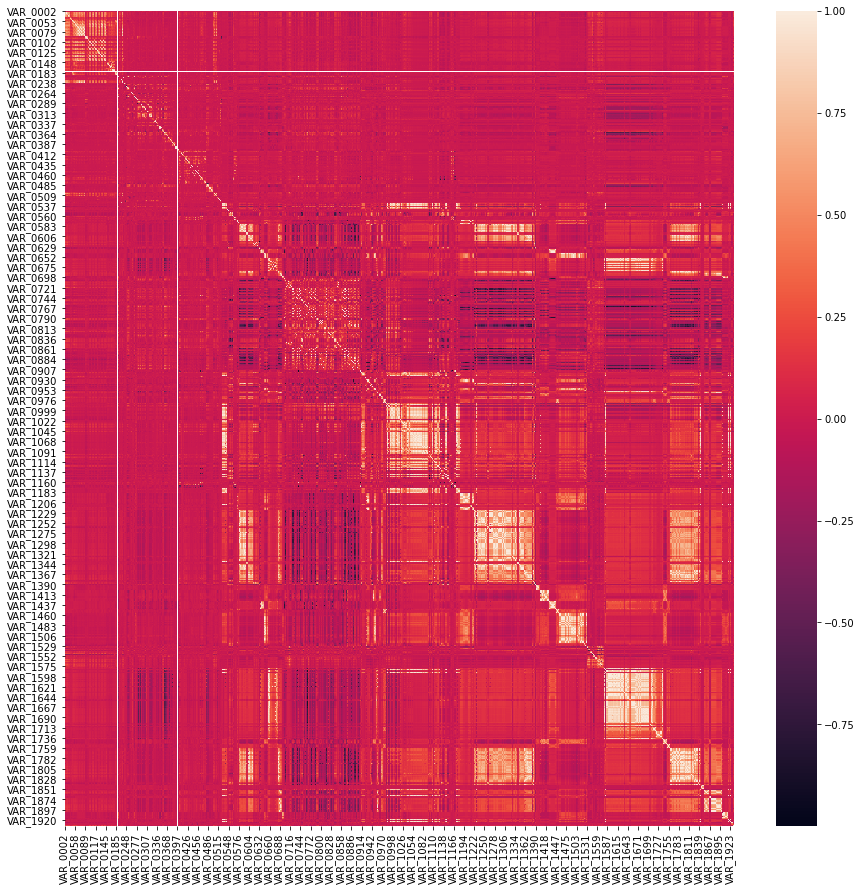

In [203]:
plt.figure(figsize=(15,15))
sns.heatmap(corr)

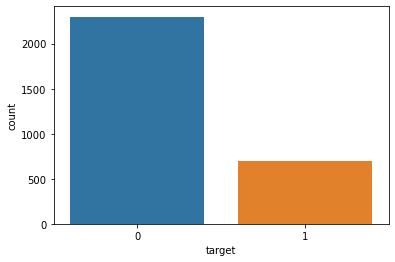

In [204]:
sns.countplot(sampledf.target)

In [205]:
print(round(sampledf.target.value_counts() *100/ sampledf.target.count(),2))

0    76.63
1    23.37
Name: target, dtype: float64


In [206]:
y = sampledf.pop('target')
X=sampledf
y.shape
X.shape

(3000,)

(3000, 1855)

In [207]:
X_c=X.copy()

In [208]:
catagorical_col = X.select_dtypes(include=[np.object]).columns
numerical_col = X.select_dtypes(include=[np.number]).columns

In [209]:
ohe = onehot(sparse = False)
ohe.fit_transform(X_c[catagorical_col])

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [210]:
ss = StandardScaler()
ss.fit_transform(X_c[numerical_col])

array([[-0.73485837, -0.50934678, -0.15211807, ..., -2.38068459,
         0.09697472, -2.71552998],
       [ 1.38629011,  2.64460498, -0.04789837, ...,  0.30717568,
         0.09902263,  0.36985199],
       [-0.55549655,  0.76373271, -0.04851369, ...,  0.30717568,
         0.09902263,  0.36985199],
       ...,
       [ 0.37250591, -0.71468219,  0.05401388, ...,  0.30717568,
         0.09902263,  0.36985199],
       [-0.73485837, -0.35329188,  1.3938715 , ..., -2.38068459,
         0.09697472, -2.71800571],
       [-0.56329489, -0.02475524,  0.03086249, ...,  0.30268093,
         0.09697472, -2.69974718]])

In [211]:
# So complete dataset is:
a = ohe.transform(X_c[catagorical_col])
b = ss.transform(X_c[numerical_col])

# 7.1 Horizontally concatenate now
Xtr = np.hstack([a,b]) # It is not X_train
Xtr.shape # (8,14)

(3000, 6126)

In [214]:
# Label encode target feature
# Our target
f"Unencoded target column is:"
y

# 8.0.2 Encode now
le = LabelEncoder()
le.fit(y)

y = le.fit_transform(y)

# Just print transformed y_train
print()
f"Encoded y is: {y}"   # Encoded y

'Unencoded target column is:'

128812    1
27014     0
19724     1
70917     0
125118    0
114118    0
26950     0
105518    0
127685    1
138458    1
35190     0
121124    1
77279     0
2108      1
82143     0
111800    1
127875    0
117658    0
50196     0
2104      0
43250     1
20787     0
112504    0
59668     0
31950     1
17507     0
102271    1
15146     0
3623      1
16437     0
52437     0
48349     0
95760     0
95705     0
113817    0
25740     1
139546    0
1417      1
48816     0
71617     0
77973     0
122787    0
137931    1
141167    0
86065     0
67510     0
127941    0
130529    0
74262     0
95603     1
128113    0
30947     0
20029     0
60646     1
118644    0
8393      0
14977     0
10216     0
58936     1
29819     0
101546    0
55757     0
60887     0
136037    0
118094    0
5584      0
93182     0
75755     0
76046     1
49677     0
87221     0
138745    0
7088      0
123281    0
23940     0
136796    1
114925    0
120169    0
24307     0
30895     0
29812     0
67876     1
34879     0
7201

LabelEncoder()

'Encoded y is: [1 0 1 ... 0 1 0]'

In [215]:
X=Xtr
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2, random_state = 10    # split-ratio
                                                    )

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)

#predicting results
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

LogisticRegression(random_state=0)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       466
           1       0.38      0.40      0.39       134

    accuracy                           0.72       600
   macro avg       0.60      0.61      0.60       600
weighted avg       0.73      0.72      0.72       600



In [217]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn import tree
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 10,max_depth=5)
dct.fit(X_train,y_train)
y_prediction = dct.predict(X_test)
print(classification_report(y_test, y_prediction))

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       466
           1       0.46      0.27      0.34       134

    accuracy                           0.77       600
   macro avg       0.64      0.59      0.60       600
weighted avg       0.73      0.77      0.74       600



In [218]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pre = model_rf.predict(X_test)
print(classification_report(y_test, y_pre))

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       466
           1       0.64      0.17      0.27       134

    accuracy                           0.79       600
   macro avg       0.72      0.57      0.58       600
weighted avg       0.77      0.79      0.74       600

